<div style="background-color:#850085; padding: 10px;">
    
# Fraud detection
    

    
</div>

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score as ras
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [247]:
df=pd.read_csv("fraudTrain.csv")
test = pd.read_excel("fraudTest.xlsx")
df.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
0,0,1/1/2019 0:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0
1,1,1/1/2019 0:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0
2,2,1/1/2019 0:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0
3,3,1/1/2019 0:01,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0
4,4,1/1/2019 0:03,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0


In [248]:
df[df["is_fraud"] == 1]

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
2449,2449,1/2/2019 1:06,4.610000e+12,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,e8a81877ae9a0a7f883e15cb39dc4022,1.0
2472,2472,1/2/2019 1:47,3.400000e+14,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,bc7d41c41103877b03232f03f1f8d3f5,1.0
2523,2523,1/2/2019 3:05,3.400000e+14,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,b98f12f4168391b2203238813df5aa8c,1.0
2546,2546,1/2/2019 3:38,4.610000e+12,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,397894a5c4c02e3c61c784001f0f14e4,1.0
2553,2553,1/2/2019 3:55,3.400000e+14,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,7863235a750d73a244c07f1fb7f0185a,1.0
...,...,...,...,...,...,...,...,...,...,...
1000885,1000885,2/15/2020 1:11,3.020000e+13,"fraud_Schumm, Bauch and Ondricka",grocery_pos,267.75,James,Baldwin,c40834346b22cab40b88999b6f7600db,1.0
1000937,1000937,2/15/2020 1:54,3.020000e+13,fraud_Stracke-Lemke,grocery_pos,283.60,James,Baldwin,351543183b955128d8209b0d0e9f1cc3,1.0
1000983,1000983,2/15/2020 2:30,3.020000e+13,fraud_Durgan-Auer,misc_net,750.98,James,Baldwin,e21fba3f053af7ea0bd31dfed1ddf2e4,1.0
1000984,1000984,2/15/2020 2:32,2.130000e+14,fraud_Bartoletti-Wunsch,gas_transport,19.06,Joanne,Padilla,3aee71b58b68fbc5341fb7daad0e83a7,1.0


In [249]:
df[df["is_fraud"] == 0]

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
0,0,1/1/2019 0:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0
1,1,1/1/2019 0:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0
2,2,1/1/2019 0:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0
3,3,1/1/2019 0:01,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0
4,4,1/1/2019 0:03,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0
...,...,...,...,...,...,...,...,...,...,...
1002098,1002098,2/15/2020 16:40,3.060000e+13,fraud_Bins-Howell,personal_care,97.57,Morgan,Smith,7681f459e3410bfc32d5480b53adb1ad,0.0
1002099,1002099,2/15/2020 16:40,3.020000e+13,fraud_Thiel Ltd,travel,2.87,Kenneth,Doyle,dcf7de10c9699f0c11cb8dfd7a8e8f65,0.0
1002100,1002100,2/15/2020 16:40,3.460000e+14,fraud_Botsford Ltd,shopping_pos,9.09,Donna,Moreno,fa5abf4fdda69146f9c66067e9e163a2,0.0
1002101,1002101,2/15/2020 16:42,3.810000e+13,fraud_Mayert Group,shopping_pos,10.00,Marissa,Clark,cf86f1a0a541182c0078b1dc81082136,0.0


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002104 entries, 0 to 1002103
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   ID           1002104 non-null  int64  
 1   Time         1002104 non-null  object 
 2   Card Number  1002104 non-null  float64
 3   merchant     1002104 non-null  object 
 4   category     1002104 non-null  object 
 5   Amount       1002103 non-null  float64
 6   firstName    1002103 non-null  object 
 7   lastName     1002103 non-null  object 
 8   trans_num    1002103 non-null  object 
 9   is_fraud     1002103 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 76.5+ MB


In [251]:
df.describe()

,ID,Card Number,Amount,is_fraud
count,1.002104e+06,1.002104e+06,1.002103e+06,1.002103e+06
mean,5.010515e+05,4.171374e+17,7.025616e+01,5.701011e-03
std,2.892827e+05,1.308840e+18,1.602039e+02,7.528954e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,0.000000e+00
25%,2.505258e+05,1.800000e+14,9.640000e+00,0.000000e+00
50%,5.010515e+05,3.520000e+15,4.742000e+01,0.000000e+00
75%,7.515772e+05,4.640000e+15,8.304000e+01,0.000000e+00
max,1.002103e+06,4.990000e+18,2.894890e+04,1.000000e+00


In [252]:
print (df.isnull().sum())

ID             0
Time           0
Card Number    0
merchant       0
category       0
Amount         1
firstName      1
lastName       1
trans_num      1
is_fraud       1
dtype: int64


In [253]:
#find null in is_fruad/Amount col and replace it with mean
df['is_fraud'].fillna(df['is_fraud'].mean(), inplace=True)
df['Amount'].fillna(df['Amount'].mean(), inplace=True)
#find null in is_fruad/Amount col and replace it with mean
test['is_fraud'].fillna(test['is_fraud'].mean(), inplace=True)
test['Amount'].fillna(test['Amount'].mean(), inplace=True)

In [254]:
#drop row if first name /last name/trans_num is null 'Not important'

df = df.dropna(subset=['firstName', 'lastName', 'trans_num'])

#drop row if first name /last name/trans_num is null 'Not important'

test = test.dropna(subset=['firstName', 'lastName', 'trans_num'])

In [255]:
print (df.isnull().sum())

ID             0
Time           0
Card Number    0
merchant       0
category       0
Amount         0
firstName      0
lastName       0
trans_num      0
is_fraud       0
dtype: int64


In [256]:
sum(df.duplicated()) #no duplicate to handle it

0

In [257]:
type(df['Time'].iloc[0])

str

In [258]:
df['Time']=pd.to_datetime(df['Time'])
test['Time']=pd.to_datetime(test['Time'])

In [259]:
type(df['Time'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [260]:
print(df['Time'])

0         2019-01-01 00:00:00
1         2019-01-01 00:00:00
2         2019-01-01 00:00:00
3         2019-01-01 00:01:00
4         2019-01-01 00:03:00
                  ...        
1002098   2020-02-15 16:40:00
1002099   2020-02-15 16:40:00
1002100   2020-02-15 16:40:00
1002101   2020-02-15 16:42:00
1002102   2020-02-15 16:42:00
Name: Time, Length: 1002103, dtype: datetime64[ns]


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1002103 entries, 0 to 1002102
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   ID           1002103 non-null  int64         
 1   Time         1002103 non-null  datetime64[ns]
 2   Card Number  1002103 non-null  float64       
 3   merchant     1002103 non-null  object        
 4   category     1002103 non-null  object        
 5   Amount       1002103 non-null  float64       
 6   firstName    1002103 non-null  object        
 7   lastName     1002103 non-null  object        
 8   trans_num    1002103 non-null  object        
 9   is_fraud     1002103 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 84.1+ MB


In [262]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 5
Integer variables: 1
Float variables: 3


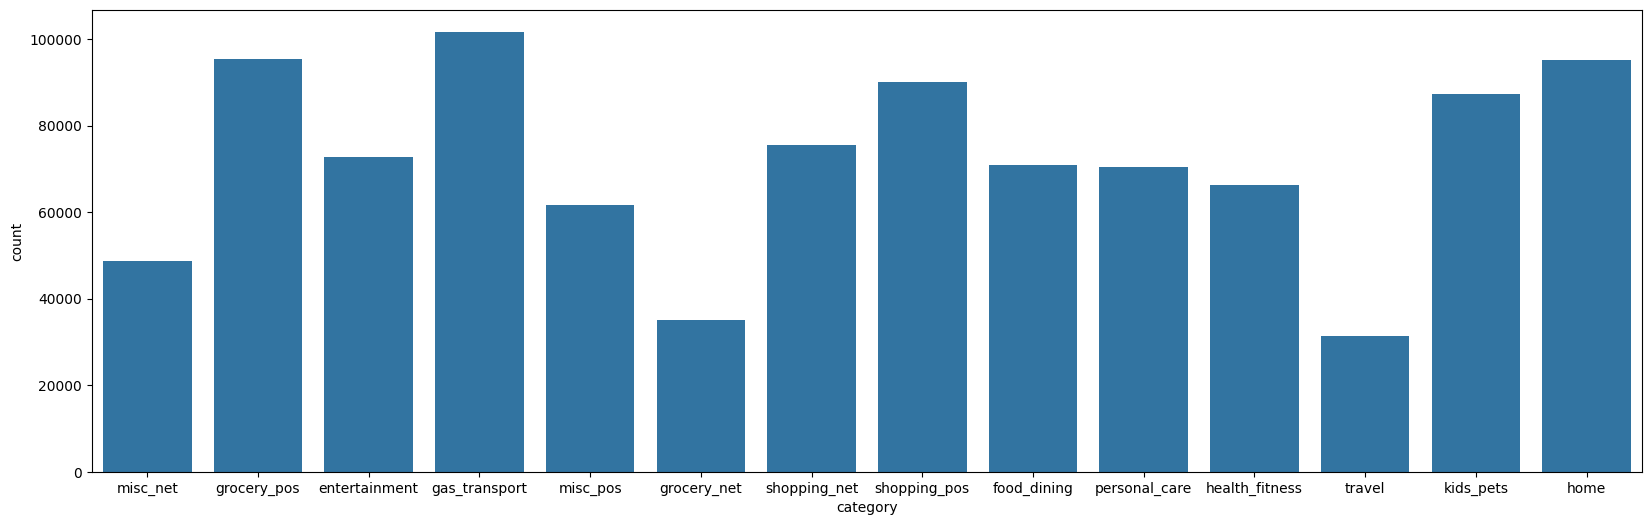

In [263]:
# Set the size of the figure
plt.figure(figsize=(20, 6))

# Plot the countplot
sns.countplot(x='category', data=df)

# Show the plot
plt.show()

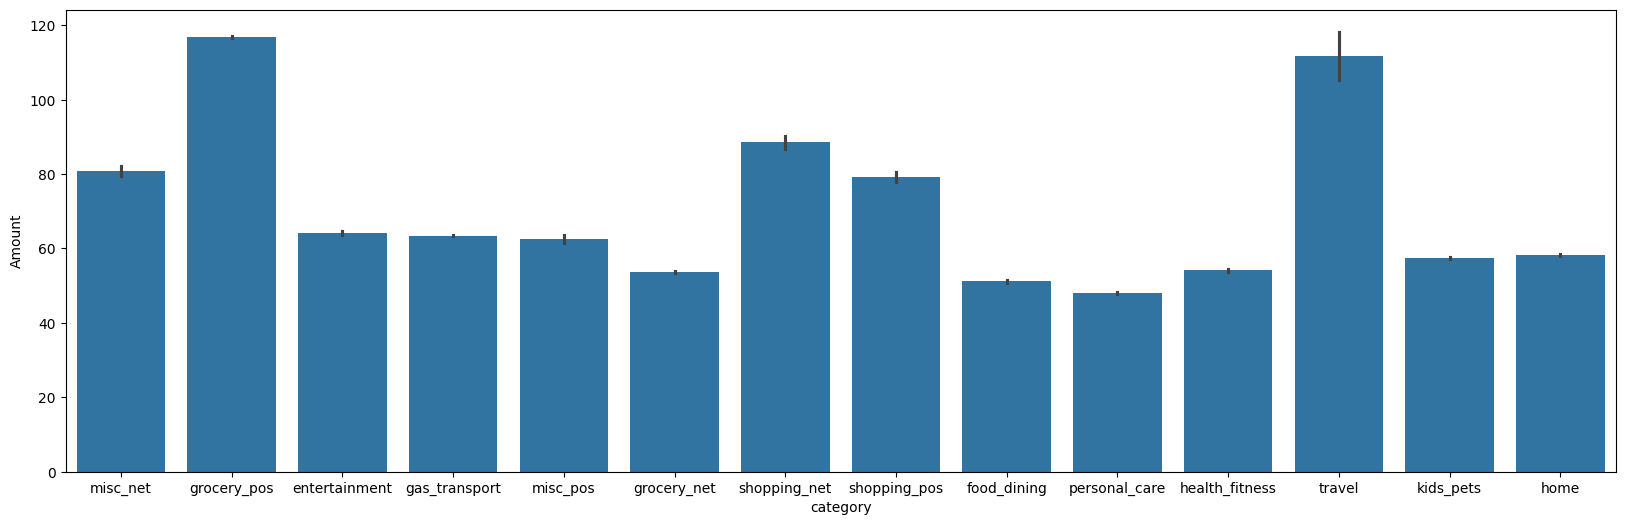

In [264]:
plt.figure(figsize=(20, 6))
sns.barplot(x='category', y='Amount', data=df)
plt.show()

In [265]:
df['is_fraud'].value_counts()

is_fraud
0.0    996390
1.0      5713
Name: count, dtype: int64

<ipython-input-266-c2b74c7c4069>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'], bins=50)


<Axes: xlabel='Time', ylabel='Density'>

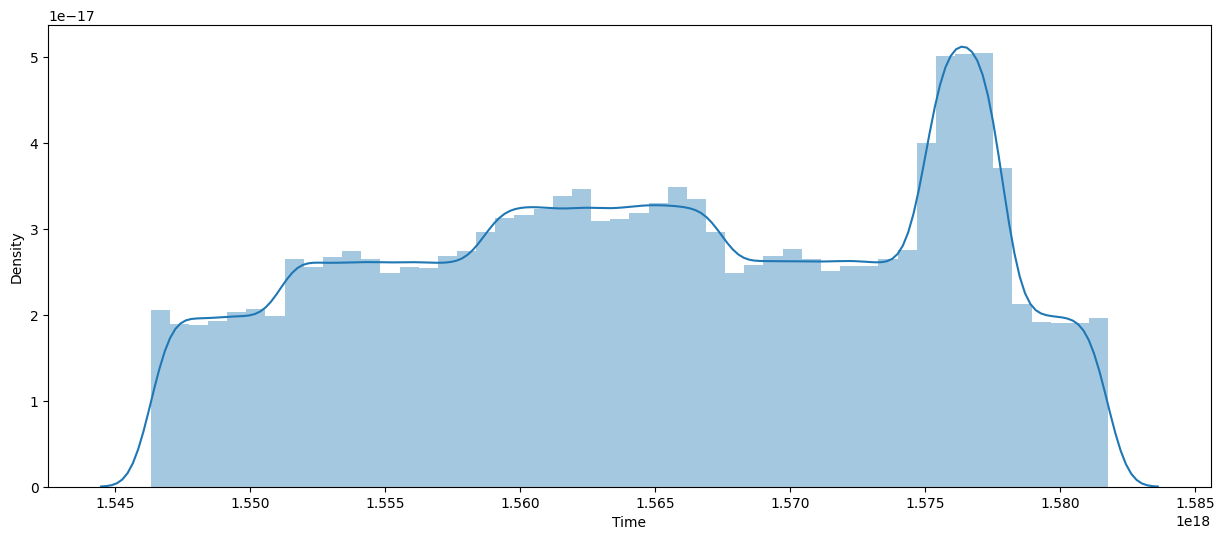

In [266]:
plt.figure(figsize=(15, 6))
sns.distplot(df['Time'], bins=50)

In [267]:
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])
df['merchant_encoded'] = label_encoder.fit_transform(df['merchant'])
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Hour'] = df['Time'].dt.hour


test['category_encoded'] = label_encoder.fit_transform(test['category'])
test['merchant_encoded'] = label_encoder.fit_transform(test['merchant'])
test['Amount_scaled'] = scaler.fit_transform(test['Amount'].values.reshape(-1, 1))
test['Hour'] = test['Time'].dt.hour

df.head()


,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,category_encoded,merchant_encoded,Amount_scaled,Hour
0,0,2019-01-01 00:00:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0,8,514,-0.407519,0
1,1,2019-01-01 00:00:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0,4,241,0.230793,0
2,2,2019-01-01 00:00:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0,0,390,0.935395,0
3,3,2019-01-01 00:01:00,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0,2,360,-0.157650,0
4,4,2019-01-01 00:03:00,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0,9,297,-0.176626,0


<ipython-input-268-1a5cdcf761f0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Hour'], bins=50)


<Axes: xlabel='Hour', ylabel='Density'>

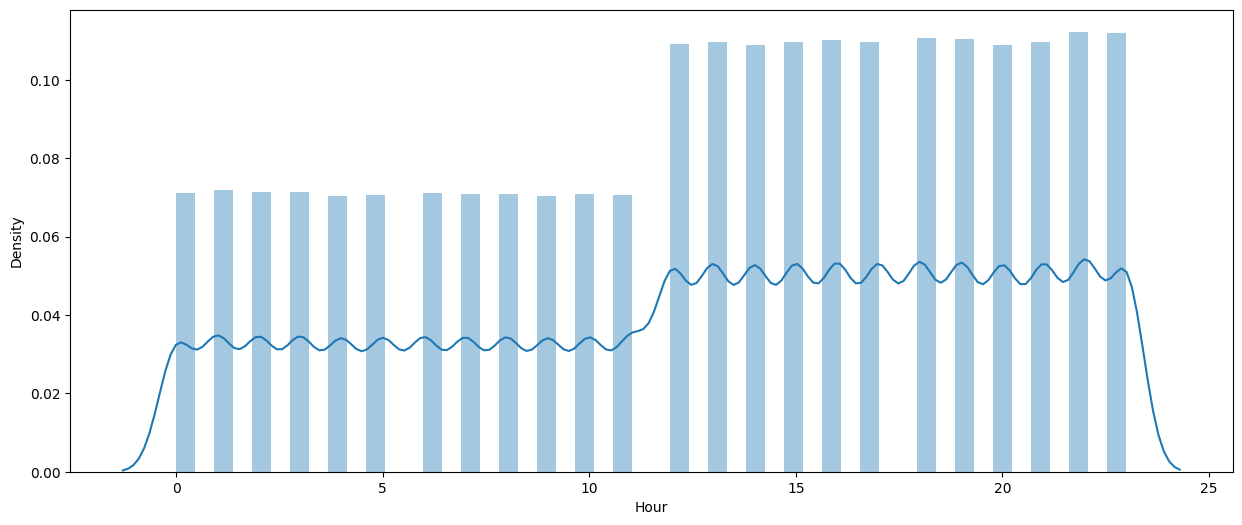

In [268]:
plt.figure(figsize=(15, 6))
sns.distplot(df['Hour'], bins=50)

In [269]:
df['Cardholder Name'] = df['firstName'] + ' ' + df['lastName']
# Calculate the average transaction amount for each cardholder
df['AverageAmountByCardholder'] = df.groupby('Cardholder Name')['Amount'].transform('mean')

# Calculate the difference between current transaction amount and average
df['AmountDiffFromAverage'] = df['Amount'] - df['AverageAmountByCardholder']

# Sort the DataFrame by 'Time' column in ascending order
df = df.sort_values('Time')


test['Cardholder Name'] = test['firstName'] + ' ' + test['lastName']
# Calculate the average transaction amount for each cardholder
test['AverageAmountByCardholder'] = test.groupby('Cardholder Name')['Amount'].transform('mean')

# Calculate the difference between current transaction amount and average
test['AmountDiffFromAverage'] = test['Amount'] - test['AverageAmountByCardholder']

# Sort the DataFrame by 'Time' column in ascending order
test = test.sort_values('Time')

df.head()


,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,category_encoded,merchant_encoded,Amount_scaled,Hour,Cardholder Name,AverageAmountByCardholder,AmountDiffFromAverage
0,0,2019-01-01 00:00:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0,8,514,-0.407519,0,Jennifer Banks,85.430418,-80.460418
1,1,2019-01-01 00:00:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0,4,241,0.230793,0,Stephanie Gill,54.206860,53.023140
2,2,2019-01-01 00:00:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0,0,390,0.935395,0,Edward Sanchez,64.479815,155.630185
3,3,2019-01-01 00:01:00,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0,2,360,-0.157650,0,Jeremy White,75.065105,-30.065105
4,4,2019-01-01 00:03:00,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0,9,297,-0.176626,0,Tyler Garcia,93.726350,-51.766350


In [270]:
df.drop(['ID', 'Card Number', 'trans_num',
         'firstName', 'lastName','merchant', 'Cardholder Name', 'trans_num', 'category'], axis=1, inplace=True)


test.drop(['ID', 'Card Number', 'trans_num',
         'firstName', 'lastName','merchant', 'Cardholder Name', 'trans_num', 'category'], axis=1, inplace=True)

df.head()

,Time,Amount,is_fraud,category_encoded,merchant_encoded,Amount_scaled,Hour,AverageAmountByCardholder,AmountDiffFromAverage
0,2019-01-01 00:00:00,4.97,0.0,8,514,-0.407519,0,85.430418,-80.460418
1,2019-01-01 00:00:00,107.23,0.0,4,241,0.230793,0,54.206860,53.023140
2,2019-01-01 00:00:00,220.11,0.0,0,390,0.935395,0,64.479815,155.630185
3,2019-01-01 00:01:00,45.00,0.0,2,360,-0.157650,0,75.065105,-30.065105
4,2019-01-01 00:03:00,41.96,0.0,9,297,-0.176626,0,93.726350,-51.766350


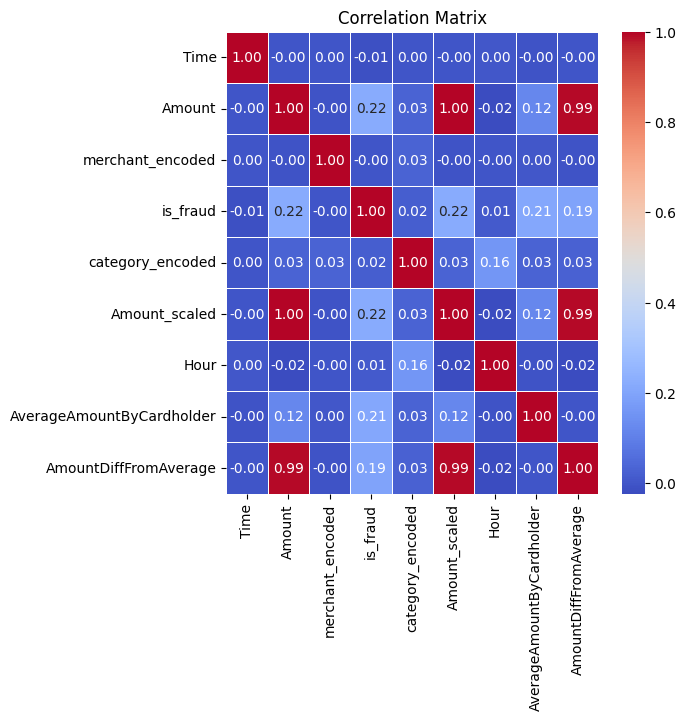

In [271]:
# Select the desired features
selected_features = ['Time', 'Amount','merchant_encoded', 'is_fraud', 'category_encoded', 'Amount_scaled', 'Hour', 'AverageAmountByCardholder', 'AmountDiffFromAverage']

# Create a subset DataFrame with the selected features
subset_df = df[selected_features]

# Calculate the correlation matrix
corr_matrix = subset_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [272]:
X = df.drop(['is_fraud', 'Time'], axis=1)
y = df['is_fraud']

In [273]:
X.shape, y.shape

((1002103, 7), (1002103,))

In [274]:
X_train= df.drop(['is_fraud', 'Time'], axis=1)
y_train= df['is_fraud']
X_test=test.drop(['is_fraud', 'Time'], axis=1)
y_test= test['is_fraud']

In [275]:
models = [LogisticRegression(), XGBClassifier(),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy',
                                 random_state=7)]

for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')

    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))

    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()

LogisticRegression() : 
Training Accuracy :  0.8505603126815197
Validation Accuracy :  0.8764444376846694

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9993118618742278
Validation Accuracy :  0.9966195126876445

RandomForestClassifier(criterion='entropy', n_est

In [276]:
# Train your fraud detection model
# Replace this with your actual model training code
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [277]:
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.998123152168632
Precision: 0.7924628450106157
Recall: 0.696037296037296
F1-score: 0.741126830479027


In [278]:
XGBClassifier_model = XGBClassifier()
XGBClassifier_model.fit(X_test, y_test)
XGBClassifier_model.score(X_test, y_test)
print(classification_report(y_test, XGBClassifier_model.predict(X_test), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    553574
       Fraud       0.95      0.78      0.86      2145

    accuracy                           1.00    555719
   macro avg       0.98      0.89      0.93    555719
weighted avg       1.00      1.00      1.00    555719

